In [2]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [49]:
import seaborn as sns; sns.set()

In [3]:
# setting the path
os.chdir("C:/Users/Ali Saghi/Desktop/edx-python/Python for Data Science/Week01/Soccer Data Analysis")
print(os.getcwd())

C:\Users\Ali Saghi\Desktop\edx-python\Python for Data Science\Week01\Soccer Data Analysis


In [4]:
# create our connection to the database 
connection = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('SELECT * FROM Player_Attributes', connection)

## Exploring Data

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(183978, 42)

In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [11]:
df.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


## Data Cleaning: Handling Missing Data

In [18]:
# is any row NULL?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [19]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

#### Fixing Null Values by Deleting Them

In [22]:
rows_before = df.shape[0]

# drop the NULL rows
df = df.dropna()

rows_after = df.shape[0]

In [23]:
print('number of rows before droping NULLs:', rows_before)
print('number of ows after droping NULLs:', rows_after)

number of rows before droping NULLs: 183978
number of ows after droping NULLs: 180354


In [24]:
print('nember of deleting items:', rows_before - rows_after)

nember of deleting items: 3624


In [25]:
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [33]:
# shuffle the rows of df so we will get a distributed sample
df = df.reindex(np.random.permutation(df.index))

In [34]:
df.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
33958,33959,179875,101969,2013-02-15 00:00:00,76.0,78.0,right,medium,low,54.0,...,64.0,67.0,30.0,30.0,26.0,13.0,12.0,8.0,7.0,15.0


## Predicting: 'overall_rating' of a player

In [35]:
df[:10][['penalties','overall_rating']]

,penalties,overall_rating
33958,67.0,76.0
170336,35.0,53.0
15594,54.0,65.0
45455,38.0,65.0
71512,23.0,60.0
38676,44.0,67.0
57858,50.0,57.0
102301,70.0,71.0
167644,49.0,63.0
138121,58.0,78.0


In [36]:
# mesaure correlation between 'penalties' and 'overall_rating'
df['overall_rating'].corr(df['penalties'])

0.39271510791118264

In [37]:
# create a list of potential features to find their correlations with overall_rating
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [42]:
for f in potentialFeatures:
    correlation = df['overall_rating'].corr(df[f])
    print('%s: %f' %(f,correlation))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Data Visualization

In [43]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [44]:
# creating a list that contains the Pearson's Correlation of cols'features with 'overall_rating'
correlations = [df['overall_rating'].corr(df[f]) for f in cols]

In [47]:
(cols[correlations.index(min(correlations))],min(correlations)), (cols[correlations.index(max(correlations))],max(correlations))

(('gk_handling', 0.006717294838211912), ('reactions', 0.7718560966627236))

In [48]:
len(cols), len(correlations)

(34, 34)

In [82]:
# create a function to plot a DataFrame with string columns and numeric values

def plot_dataframe(df,y_label):
    fig = plt.gcf()
    fig.set_size_inches(15,8)
    
    ax = df.correlation.plot(linewidth=3.3, color='coral')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attribute, rotation=75)
    
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [83]:
df_corr = pd.DataFrame({'attribute':cols, 'correlation':correlations})

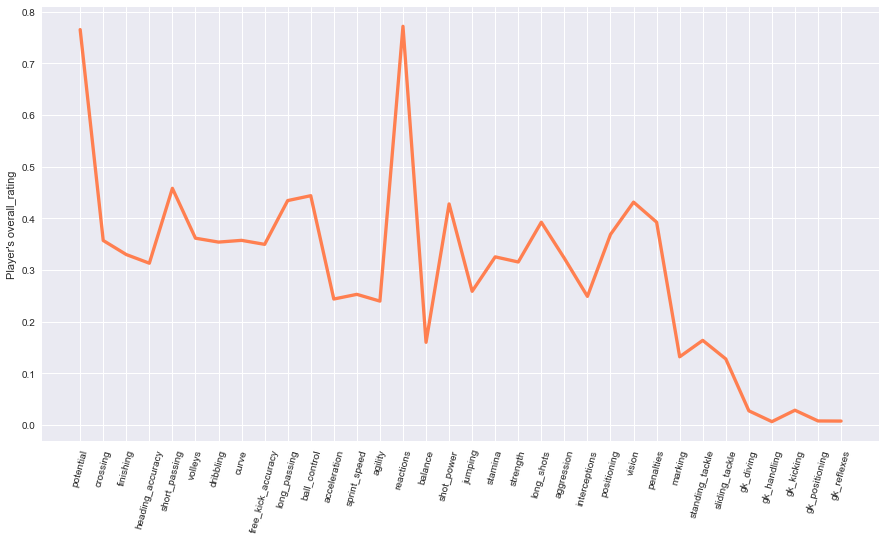

In [84]:
plot_dataframe(df_corr, 'Player\'s overall_rating')

<h1 style="font-size:1.5em;color:#FB11C4">Analysis of Findings</h1>

Suppose you want to predict the player's **overall_rating**; what 5 player's features would you ask?

## Clustering Players into Similar Groups(ML with KMeans Clustring)

In [85]:
# define the features for grouping players
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [87]:
# create new DataFrame according to group features
df_select = df[select5features].copy(deep=True)

In [88]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
33958,8.0,78.0,30.0,38.0,30.0
170336,9.0,63.0,51.0,48.0,56.0
15594,11.0,68.0,65.0,63.0,61.0
45455,15.0,65.0,65.0,62.0,70.0
71512,78.0,60.0,25.0,25.0,25.0


## KMeans Clustring

In [89]:
# scaling the dataset
data = scale(df_select)

In [106]:
# creating a model with 4 clusters
model = KMeans(n_clusters=4)

In [107]:
# train the model with dataset
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
print(90*'_')
print('\nCount of players in each cluster')
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50647
1    55855
2    50067
3    23785
dtype: int64

In [109]:
# create a composite DataFrame for plotting the clusters using customplot.py
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.044679,0.700445,1.027365,0.982318,1.029940,0
1,-0.477100,0.106977,-0.948378,-0.975857,-0.914847,1
2,-0.335221,-0.847380,0.545624,0.403817,0.548035,2
3,1.920642,0.039130,-1.111156,-0.652256,-1.200435,3


## Visualization of Clusters

C:\Users\Ali Saghi\05_edx\Python for Data Science\Week_01\customplot.py:31: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


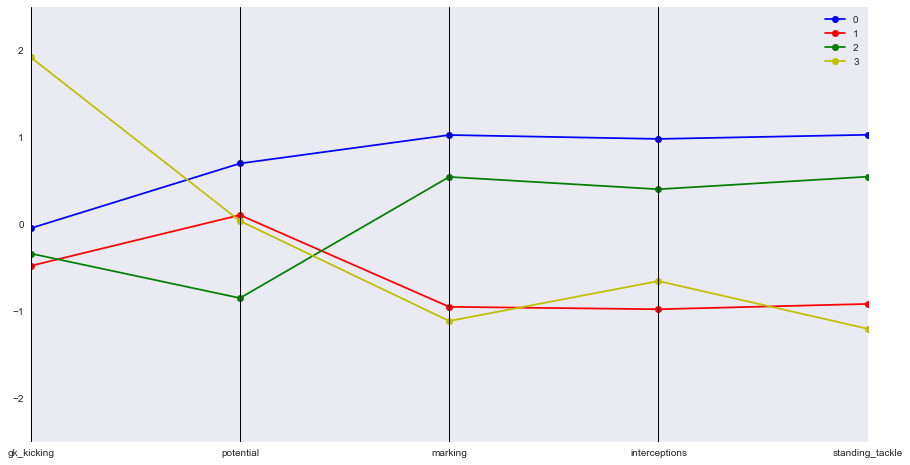

In [110]:
%matplotlib inline
parallel_plot(P)

### Can you identify the groups for each of the below?
* Two groups are very similar except in gk_kicking - these players can coach each other on gk_kicking, where they differ.
* Two groups are somewhat similar to each other except in potential.